In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams ['figure.figsize'] = 10,6

In [3]:
dataset = pd.read_csv("AirPassengers.csv")
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format = True)
indexedDataset = dataset.set_index(['Month'])

In [4]:
indexedDataset.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [5]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


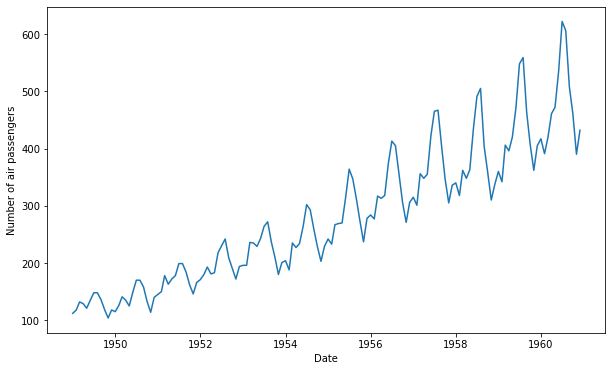

In [6]:
plt.xlabel("Date")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

<AxesSubplot:xlabel='Month'>

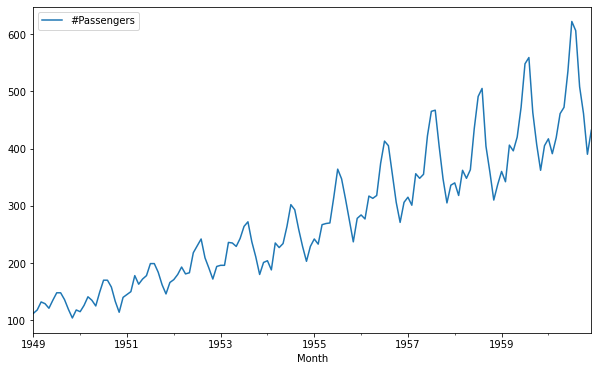

In [7]:
 indexedDataset.plot()

In [8]:
#Rolling Test
rolmean = indexedDataset.rolling(window = 12).mean()
rolstd = indexedDataset.rolling(window = 12).std()
print (rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


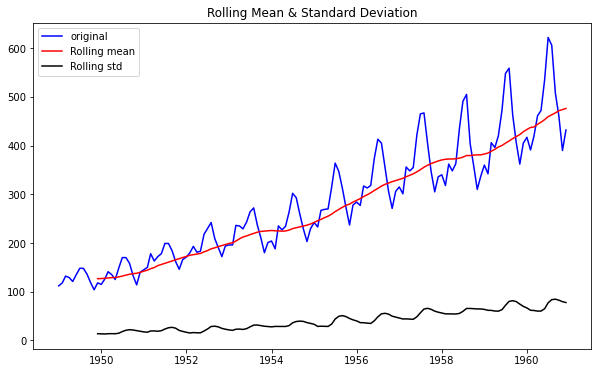

In [9]:
#plot rolling statistic
orig = plt.plot(indexedDataset, color='blue', label='original')
mean = plt.plot(rolmean, color='red', label= 'Rolling mean')
std = plt.plot(rolstd, color='black', label= 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:

#Dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ('Result of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical value (%s)'%key] = value
    
print(dfoutput)

Result of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


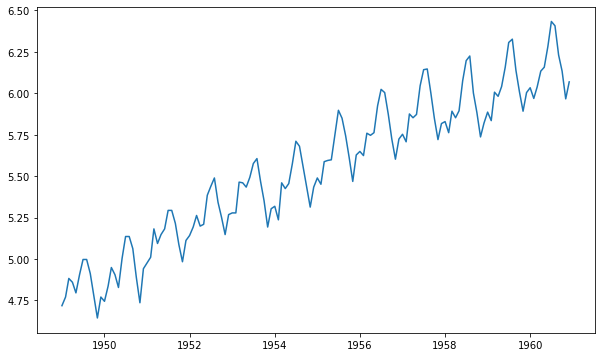

In [11]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

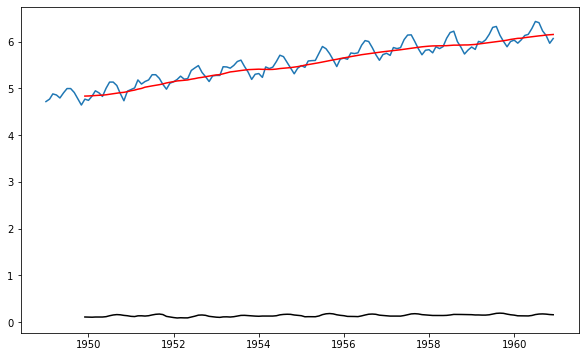

In [12]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')
plt.plot(movingSTD, color='black')

In [13]:
newDataset = indexedDataset_logScale - movingAverage
newDataset.head(12)
#Removing Nal Value
newDataset.dropna(inplace = True)
newDataset.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [14]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
#plot rolling statistic
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue',label='original')
    mean = plt.plot(movingAverage, color='red',label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label= 'Rolling std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
#Dickey fuller test
    print ('Result of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical value (%s)'%key] = value
    print(dfoutput) 

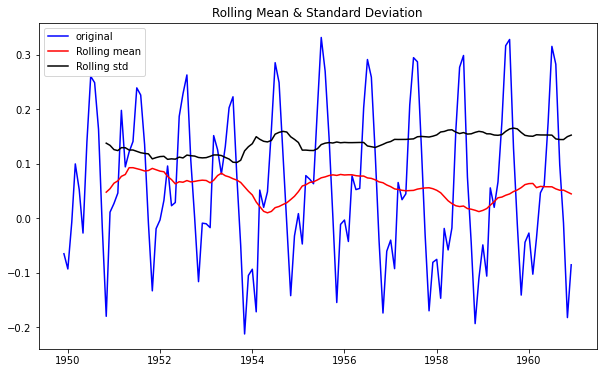

Result of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical value (1%)             -3.486535
Critical value (5%)             -2.886151
Critical value (10%)            -2.579896
dtype: float64


In [15]:
test_stationarity(newDataset)

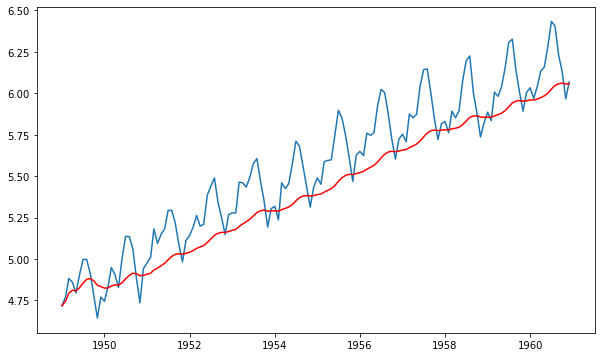

In [16]:
weightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(weightedAverage, color='red')

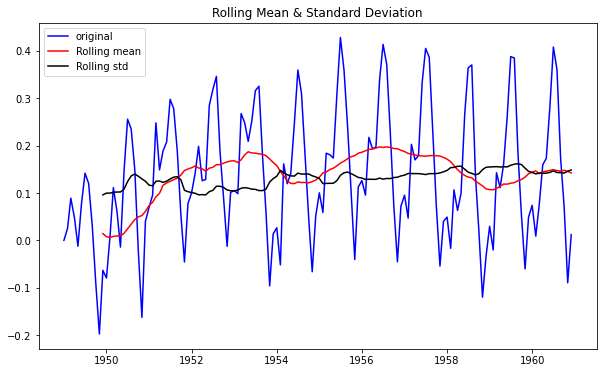

Result of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical value (1%)             -3.481682
Critical value (5%)             -2.884042
Critical value (10%)            -2.578770
dtype: float64


In [17]:
datasetLogScaleMinusweightedAverage = indexedDataset_logScale - weightedAverage
test_stationarity(datasetLogScaleMinusweightedAverage)

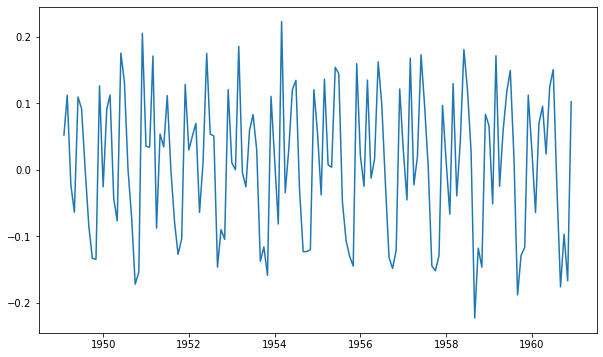

In [18]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift() 
plt.plot(datasetLogDiffShifting)

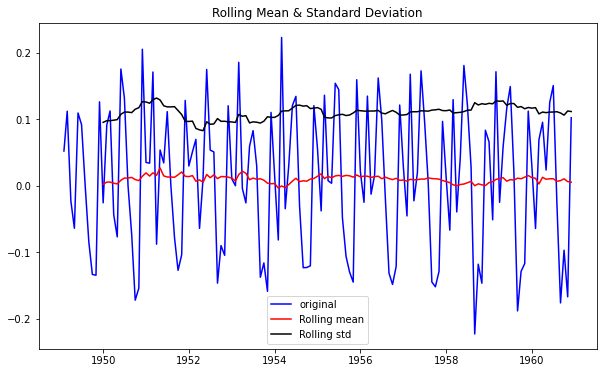

Result of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical value (1%)             -3.482501
Critical value (5%)             -2.884398
Critical value (10%)            -2.578960
dtype: float64


In [19]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

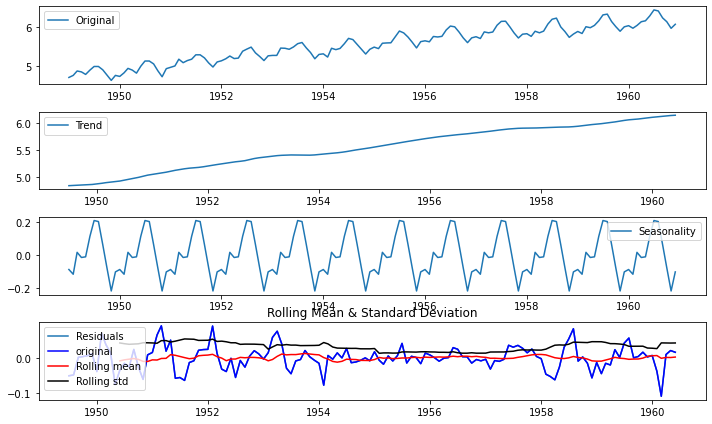

Result of Dickey-Fuller Test:


KeyError: '#Passengers'

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


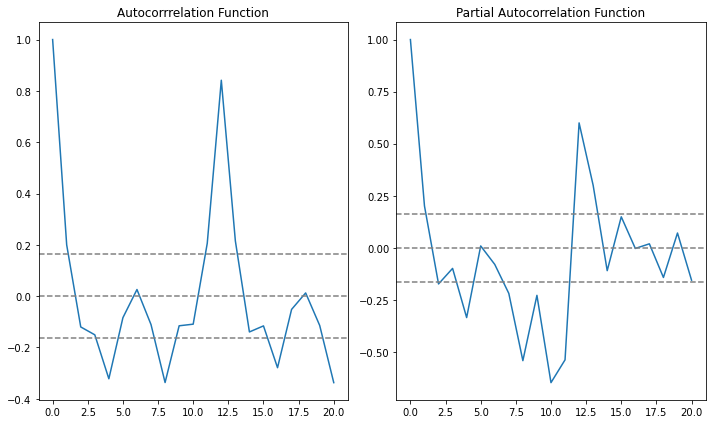

In [21]:
#ACF and PACF;
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y= -1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrrelation Function')
#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y= -1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y= 1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
#fft=False

C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

plotting AR model


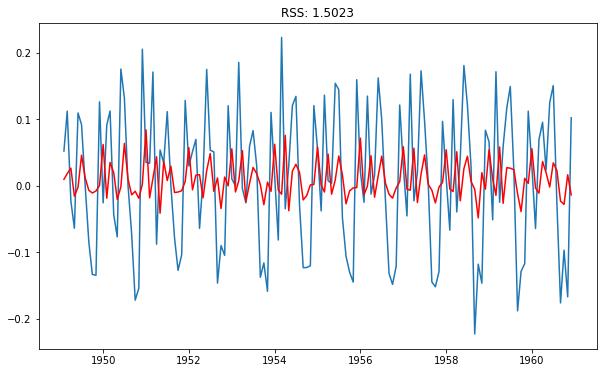

In [22]:
from statsmodels.tsa.arima_model import ARIMA
#AR model
model = ARIMA(indexedDataset_logScale, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting ["#Passengers"])**2))
print('plotting AR model')




C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting MA model


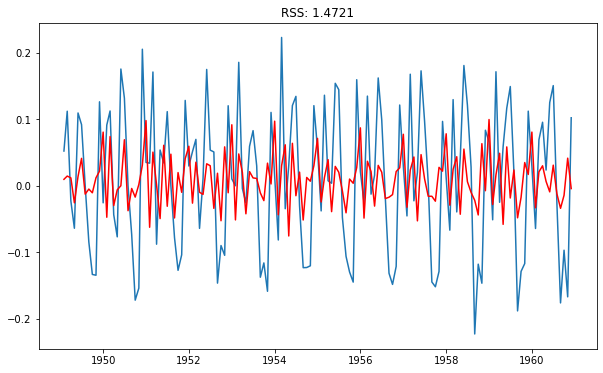

In [23]:
#MA model
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting ["#Passengers"])**2))
print('plotting MA model')

C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\LZBD\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


plotting ARIMA model


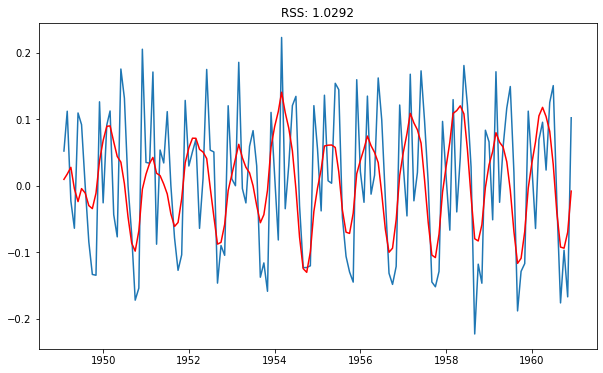

In [24]:
#ARIMA model
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting ["#Passengers"])**2))
print('plotting ARIMA model')

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [26]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff.cumsum())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
                ...   
1960-08-01    1.372552
1960-09-01    1.280202
1960-10-01    1.186189
1960-11-01    1.116266
1960-12-01    1.108139
Length: 143, dtype: float64


In [27]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0) 
predictions_ARIMA_log.head(20)

Month
1949-01-01    4.718499
1949-02-01    4.780265
1949-03-01    4.909873
1949-04-01    4.914554
1949-05-01    4.846011
1949-06-01    4.931606
1949-07-01    5.019197
1949-08-01    5.008219
1949-09-01    4.893733
1949-10-01    4.725734
1949-11-01    4.579723
1949-12-01    4.743229
1950-01-01    4.785611
1950-02-01    4.966395
1950-03-01    5.168902
1950-04-01    5.191569
1950-05-01    5.158661
1950-06-01    5.369761
1950-07-01    5.504713
1950-08-01    5.457586
dtype: float64

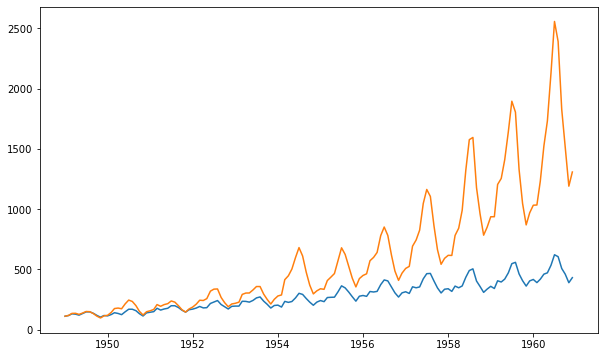

In [28]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

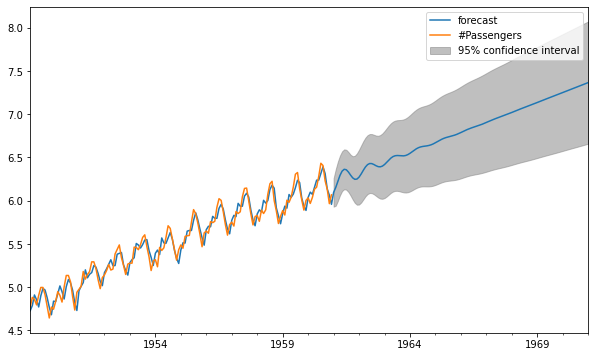

In [29]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

In [30]:
x[1]

array([0.08384711, 0.10749461, 0.11568693, 0.11702773, 0.11703494,
       0.11744015, 0.11762248, 0.11778711, 0.1202416 , 0.12736039,
       0.13870956, 0.15118788, 0.16157809, 0.16834389, 0.17177323,
       0.17311976, 0.17358726, 0.17385452, 0.1743021 , 0.17543324,
       0.1778814 , 0.18195714, 0.18726209, 0.19283384, 0.19769236,
       0.2013063 , 0.20369046, 0.20519823, 0.20625259, 0.20720989,
       0.20836961, 0.21000316, 0.21229734, 0.21524468, 0.21860168,
       0.22198245, 0.22503053, 0.22755283, 0.22954795, 0.23114786,
       0.23253813, 0.23390522, 0.23541298, 0.23718299, 0.23926525,
       0.24161525, 0.24410358, 0.24656343, 0.24885242, 0.25089615,
       0.25269719, 0.25431614, 0.25584298, 0.25737214, 0.25898375,
       0.26072835, 0.26261533, 0.26461074, 0.26664883, 0.26865465,
       0.27056833, 0.27236081, 0.27403685, 0.27562758, 0.27717813,
       0.2787351 , 0.28033575, 0.28200001, 0.28372665, 0.28549493,
       0.28727193, 0.28902328, 0.29072319, 0.29236065, 0.29394

In [31]:
len(x[1])

120

In [32]:
results_ARIMA.forecast(steps=120)

(array([6.09553395, 6.15281405, 6.22442965, 6.29241095, 6.34164705,
        6.36359346, 6.35784669, 6.33139289, 6.29597529, 6.26447707,
        6.24738322, 6.2502517 , 6.27275833, 6.30940306, 6.35151483,
        6.3898864 , 6.41727363, 6.43011035, 6.42906671, 6.41842473,
        6.40456142, 6.39403605, 6.39183074, 6.40019495, 6.41833682,
        6.44295395, 6.46937419, 6.49293967, 6.51024098, 6.51989012,
        6.52267558, 6.52112369, 6.5186451 , 6.51853675, 6.52311908,
        6.53322346, 6.54812854, 6.5659154 , 6.58410289, 6.60036518,
        6.61313243, 6.62192758, 6.62737766, 6.63093107, 6.63438668,
        6.63937965, 6.64696485, 6.65739821, 6.67015304, 6.68414229,
        6.69806603, 6.71077876, 6.72157706, 6.73033958, 6.73749785,
        6.74386353, 6.75037298, 6.75782569, 6.76668658, 6.77699799,
        6.78841294, 6.80032827, 6.81207167, 6.82308732, 6.83307107,
        6.84202463, 6.85022283, 6.85811192, 6.86617312, 6.87479123,
        6.88416274, 6.89426355, 6.9048786 , 6.91